# Task A.3.4: Classify the Pinguins (Unsupervised) (5 pts - Optional)

This dataset is the classification of 3 types of penguins based on the length of their bill (or beak).  Here, you should build a K-means clustering model and evaluate your model in terms of accuracy.

- Load the dataset of Pinguins: penguins.csv Download penguins.csv. We only need 3 columns of the dataset: "species", "bill_length_mm", and "bill_depth_mm". the data distribution is shown in the below figure.
- Build a K-means clustering model to cluster the penguins' types based on "bill_length_mm" and "bill_depth_mm". Visualize the clusters in an XY plane, like the figure below but with the result of your mode. Put the "centroids" of each cluster in the figure. 
- Evaluate the model and find the accuracy of your model



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('penguins.csv')
df = df[['species', 'bill_length_mm', 'bill_depth_mm']]
df.dropna(inplace=True)
print(df.head())

  species  bill_length_mm  bill_depth_mm
0  Adelie            39.1           18.7
1  Adelie            39.5           17.4
2  Adelie            40.3           18.0
4  Adelie            36.7           19.3
5  Adelie            39.3           20.6


In [3]:
X = df[['bill_length_mm', 'bill_depth_mm']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

df["cluster"] = kmeans.labels_

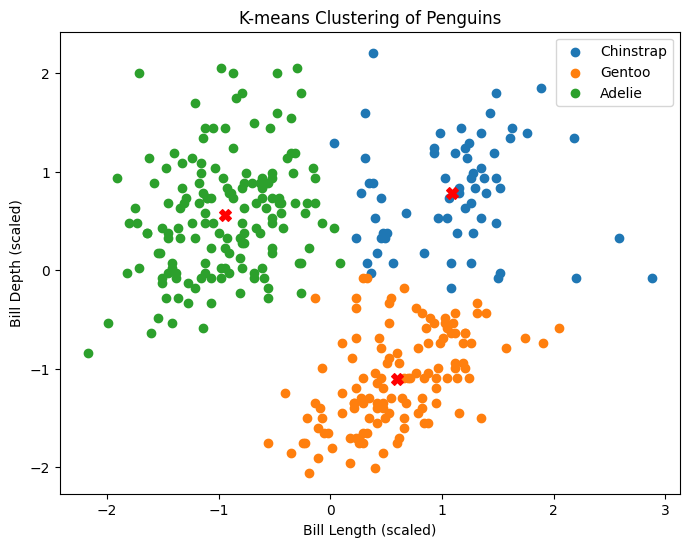

In [5]:
cluster_to_species = {
    2: "Adelie",
    1: "Gentoo",
    0: "Chinstrap"
}

plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(
        X_scaled[df["cluster"] == cluster, 0],  
        X_scaled[df["cluster"] == cluster, 1],  
        label=cluster_to_species[cluster]
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],  
    s=70,  
    c="red",  
    marker="X",  
)


plt.xlabel("Bill Length (scaled)")
plt.ylabel("Bill Depth (scaled)")
plt.title("K-means Clustering of Penguins")
plt.legend()
plt.show()

In [6]:
df["predicted_species"] = df["cluster"].map(cluster_to_species)

accuracy = accuracy_score(df["species"], df["predicted_species"])
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93
